<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/TF_Basic/TF2_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-07-08 17:24:05--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-07-08 17:24:05 (35.9 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
data = pd.read_csv('moore.csv', header = None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

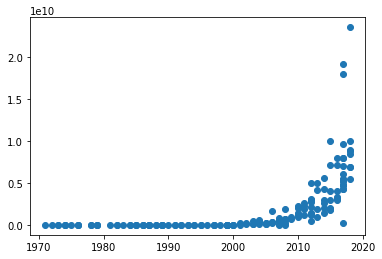

In [ ]:
plt.scatter(X,Y)

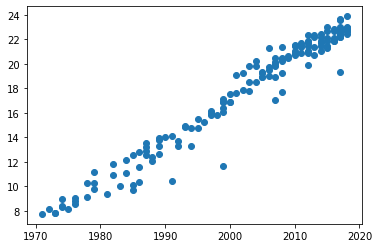

In [ ]:
Y = np.log(Y)
plt.scatter(X,Y)

In [ ]:
X = X - X.mean()

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape = (1,)),
                                    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss = 'mse')

In [ ]:
def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X,Y,epochs=200, callbacks = [scheduler])

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 348.2326 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 449.9723 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 320.9564 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 202.1771 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 154.8610 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 134.5959 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 91.3365 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 8ms/step - loss: 65.6367 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 7ms/step - loss: 49.7694 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 35.5319 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss: 2

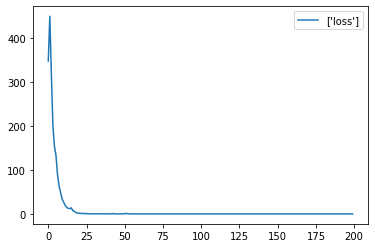

In [ ]:
plt.plot(r.history['loss'], label = ['loss'])
plt.legend()

In [45]:
Yhat = model.predict(X).flatten()

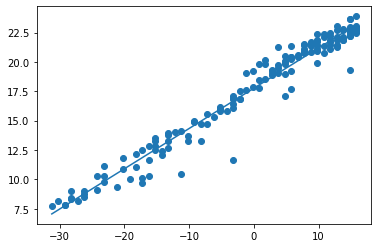

In [46]:
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [47]:
w,b = model.layers[0].get_weights()

In [48]:
X = X.reshape(-1,1)

In [49]:
Yhat2 = (X.dot(w) +b).flatten()
np.allclose(Yhat,Yhat2)

True